In [10]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import csv
import pandas as pd

In [2]:
# Recordings (folder 'data'):
# unit5062_2025_July_26th_night_pt1.json
# unit5062_2025_July_26th_night_pt2.json

In [3]:
def plot_noise_from_file(filename, title = "Noise Levels Over Time"):
    # Load JSON data from file
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    # Parse nested JSON string inside 'historyJson'
    nested = json.loads(raw_data["historyJson"])

    # Extract and convert sample data safely (skip empty strings)
    samples = [float(s) for s in nested["storageVolume"].split(";") if s.strip()]

    # Timing info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]
    sample_count = len(samples)
    interval_ms = duration_ms / sample_count

    # Generate timestamps for x-axis
    timestamps = [
        datetime.fromtimestamp(start_ms / 1000.0) + timedelta(milliseconds=i * interval_ms)
        for i in range(sample_count)
    ]

    # Plotting
    plt.figure(figsize=(14, 5))
    plt.plot(timestamps, samples, linewidth=0.8)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("dB (decibels)")
    plt.ylim(30,70)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

In [4]:
def get_recording_time_info(filename):
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    nested = json.loads(raw_data["historyJson"])

    # Extract time info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]

    # Convert to datetime objects
    start_dt = datetime.fromtimestamp(start_ms / 1000.0)
    end_dt = start_dt + timedelta(milliseconds=duration_ms)

    # Return formatted date and times
    return {
        "date": start_dt.date().isoformat(),
        "start_time": start_dt.time().isoformat(timespec='seconds'),
        "end_time": end_dt.time().isoformat(timespec='seconds')
    }

# Example:
# info = get_recording_time_info("history0.json")
# print(info)



July 26th, 2025 - Unit 5062


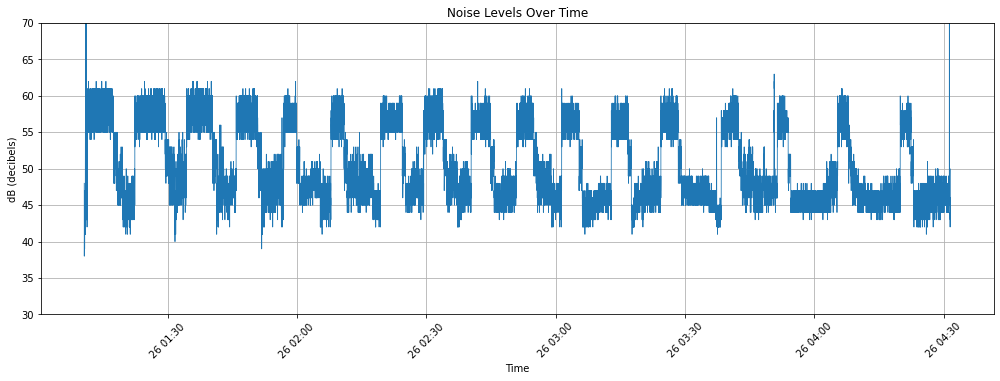

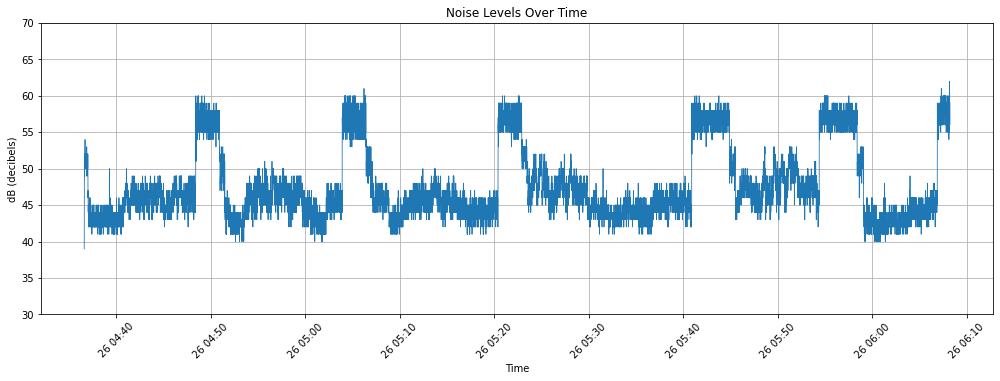


July 27th, 2025 - Unit 5062


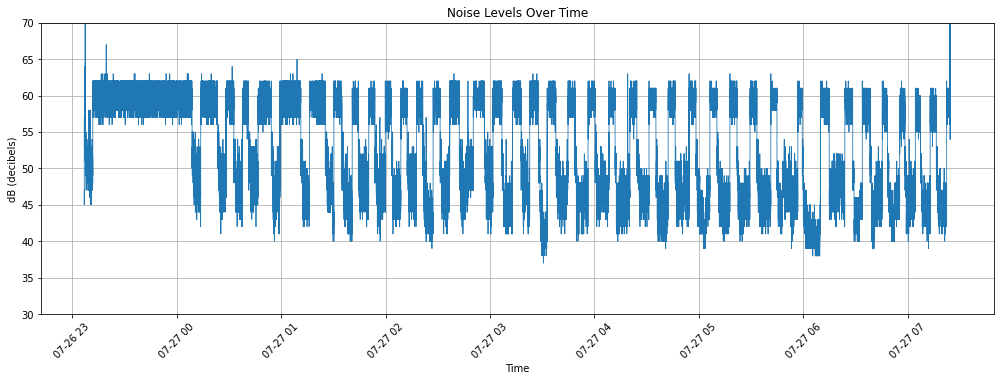

In [5]:
print('\nJuly 26th, 2025 - Unit 5062')
plot_noise_from_file('data/unit5062_2025_July_26th_night_pt1.json')
plot_noise_from_file('data/unit5062_2025_July_26th_night_pt2.json')
print('\nJuly 27th, 2025 - Unit 5062')
plot_noise_from_file('data/unit5062_2025_July_27th_night.json')

In [7]:
def convert_noise_to_csv(input_file, output_file):
    # Load JSON
    with open(input_file, 'r') as f:
        raw_data = json.load(f)

    nested = json.loads(raw_data["historyJson"])

    # Extract sample data and time info
    samples = [float(s) for s in nested["storageVolume"].split(";") if s.strip()]
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]
    sample_count = len(samples)
    interval_ms = duration_ms / sample_count

    # Generate timestamps and write to CSV
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Time", "Noise (dB)"])  # Header

        for i, value in enumerate(samples):
            timestamp = datetime.fromtimestamp(start_ms / 1000.0) + timedelta(milliseconds=i * interval_ms)
            writer.writerow([timestamp.isoformat(sep=' '), value])

# Example usage:
# convert_noise_to_csv("history0.json", "noise_data.csv")


In [15]:
convert_noise_to_csv('data/unit5062_2025_July_26th_night_pt1.json', 'unit5062_2025_July_26th_night_pt1.csv')
convert_noise_to_csv('data/unit5062_2025_July_26th_night_pt2.json', 'unit5062_2025_July_26th_night_pt2.csv')
convert_noise_to_csv('data/unit5062_2025_July_27th_night.json', 'unit5062_2025_July_27th_night.csv')

# Unit 2063 over night

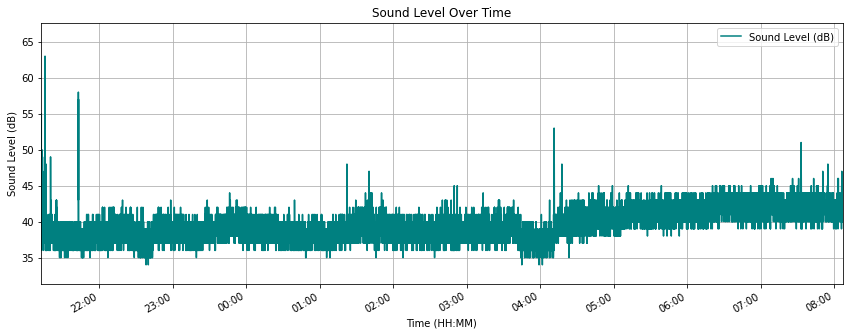

In [71]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load JSON
with open('data/15.json') as f:
    data = json.load(f)

# Parse and clean sound levels
raw_values = data['storageVolume'].split(';')
sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

# Define new start time
fixed_start = datetime(2025, 7, 27, 21, 12, 36)

# Create new time axis with uniform 1-second intervals
timestamps = [fixed_start + timedelta(seconds=i) for i in range(len(sound_levels))]

# Define end time for x-axis limit
fixed_end = fixed_start + timedelta(hours=10.91)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, sound_levels, label="Sound Level (dB)", color='teal')

# Format x-axis as HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set x-axis limits
plt.xlim(fixed_start, fixed_end)

plt.xlabel("Time (HH:MM)")
plt.ylabel("Sound Level (dB)")
plt.title("Sound Level Over Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()


In [70]:


# Load JSON file
with open("data/15.json", "r") as f:
    data = json.load(f)

# Extract and format metadata
metadata = {
    "id": data.get("id"),
    "startTime (raw)": data.get("startTime"),
    "startTime (local)": datetime.fromtimestamp(data.get("startTime") / 1000).strftime("%Y-%m-%d %H:%M:%S"),
    "duration_ms": data.get("duration"),
    "duration_hours": round(data.get("duration") / (1000 * 60 * 60), 2),
    "avgValue_dB": data.get("avgValue"),
    "minValue_dB": data.get("minValue"),
    "maxValue_dB": data.get("maxValue"),
    "status": data.get("statu"),  # typo in original field name
    "recording_path": data.get("path"),
    "num_samples": len([v for v in data.get("storageVolume", "").split(";") if v.strip().isdigit()]),
    "num_marks": len(data.get("mark", "").split(";")) if data.get("mark") else 0
}

# Print nicely
for key, value in metadata.items():
    print(f"{key}: {value}")


id: 15
startTime (raw): 1753675956226
startTime (local): 2025-07-27 21:12:36
duration_ms: 39270300
duration_hours: 10.91
avgValue_dB: 39.013374
minValue_dB: 33.0
maxValue_dB: 66.0
status: Quiet Whisper
recording_path: /storage/emulated/0/Android/data/app.tools.soundmeter.decibel.noisedetector/files/sound_recorder/Recording_250728_1.amr
num_samples: 196353
num_marks: 6


# Unit 5062 daytime (~ 2 hrs)

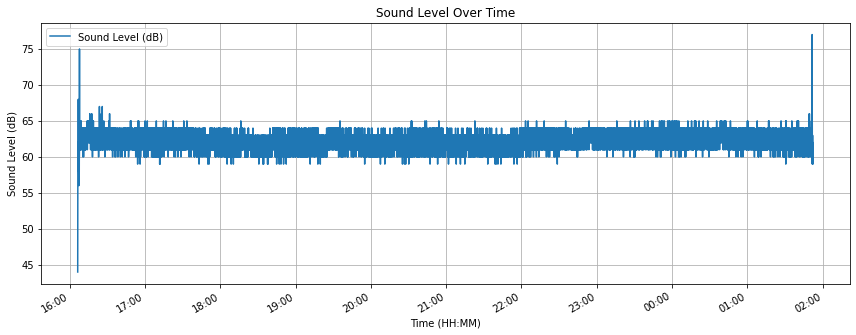

In [22]:


# Load JSON
with open('data/14.json') as f:
    data = json.load(f)

# Parse and clean sound levels
raw_values = data['storageVolume'].split(';')
sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

# Get start time and create time axis
start_time_ms = data.get('startTime')
start_datetime = datetime.fromtimestamp(start_time_ms / 1000)

timestamps = [start_datetime + timedelta(seconds=i) for i in range(len(sound_levels))]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(timestamps, sound_levels, label="Sound Level (dB)")

# Format x-axis as HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time (HH:MM)")
plt.ylabel("Sound Level (dB)")
plt.title("Sound Level Over Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()


In [87]:


# Load JSON file
with open("data/14.json", "r") as f:
    data = json.load(f)

# Extract and format metadata
metadata = {
    "id": data.get("id"),
    "startTime (raw)": data.get("startTime"),
    "startTime (local)": datetime.fromtimestamp(data.get("startTime") / 1000).strftime("%Y-%m-%d %H:%M:%S"),
    "duration_ms": data.get("duration"),
    "duration_hours": round(data.get("duration") / (1000 * 60 * 60), 2),
    "avgValue_dB": data.get("avgValue"),
    "minValue_dB": data.get("minValue"),
    "maxValue_dB": data.get("maxValue"),
    "status": data.get("statu"),  # typo in original field name
    "recording_path": data.get("path"),
    "num_samples": len([v for v in data.get("storageVolume", "").split(";") if v.strip().isdigit()]),
    "num_marks": len(data.get("mark", "").split(";")) if data.get("mark") else 0
}

# Print nicely
for key, value in metadata.items():
    print(f"{key}: {value}")


id: 14
startTime (raw): 1753657584655
startTime (local): 2025-07-27 16:06:24
duration_ms: 7029720
duration_hours: 1.95
avgValue_dB: 62.26948
minValue_dB: 44.0
maxValue_dB: 77.0
status: Conversation
recording_path: /storage/emulated/0/Android/data/app.tools.soundmeter.decibel.noisedetector/files/sound_recorder/Recording_250727_2.amr
num_samples: 35150
num_marks: 3


In [1]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import csv
import pandas as pd

In [100]:
def plot_noise_from_file(filename, title="Noise Levels Over Time", start_time=None, end_time=None):
    # Load JSON data from file
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    # Parse nested JSON string inside 'historyJson'
    nested = json.loads(raw_data["historyJson"])

    # Extract and convert sample data safely (skip empty strings)
    samples = [float(s) for s in nested["storageVolume"].split(";") if s.strip()]

    # Timing info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]
    sample_count = len(samples)
    interval_ms = duration_ms / sample_count

    # Generate timestamps
    timestamps = [
        datetime.fromtimestamp(start_ms / 1000.0) + timedelta(milliseconds=i * interval_ms)
        for i in range(sample_count)
    ]

    # Filter data between start_time and end_time
    if start_time or end_time:
        filtered = [
            (t, s) for t, s in zip(timestamps, samples)
            if (start_time is None or t >= start_time) and (end_time is None or t <= end_time)
        ]
        if not filtered:
            print("No data in the specified time range.")
            return
        timestamps, samples = zip(*filtered)

    # Plotting
    #plt.figure(figsize=(14, 5))
    plt.plot(timestamps, samples, linewidth=0.8)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sound Level (dB)")
    plt.ylim(30, 70)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.savefig(title+'.pdf',bbox_inches='tight')
    plt.show()


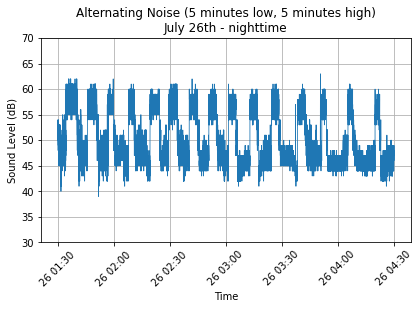

In [99]:
plot_noise_from_file(
    "data/unit5062_2025_July_26th_night_pt1.json", title = 'Alternating Noise (5 minutes low, 5 minutes high)\nJuly 26th - nighttime',
    start_time=datetime(2025, 7, 26, 1, 30, 0),
    end_time=datetime(  2025, 7, 26, 4, 30, 0)
)

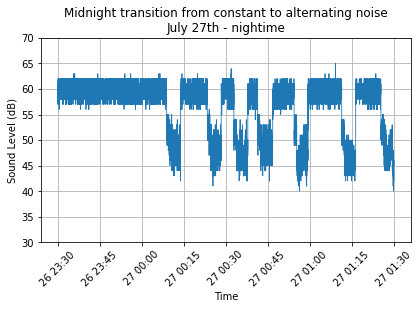

In [103]:
plot_noise_from_file(
    "data/unit5062_2025_July_27th_night.json", title = 'Midnight transition from constant to alternating noise\nJuly 27th - nightime',
    start_time=datetime(2025, 7, 26, 23, 30, 0),
    end_time=datetime(  2025, 7, 27, 1, 30, 0)
)

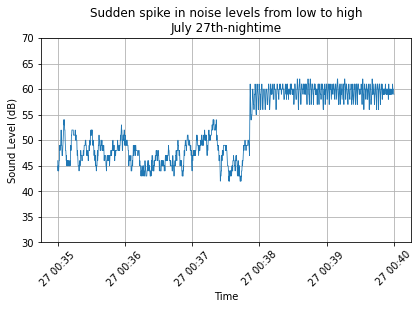

In [104]:
plot_noise_from_file(
    "data/unit5062_2025_July_27th_night.json", title = 'Sudden spike in noise levels from low to high\nJuly 27th-nightime',
    start_time=datetime(2025, 7, 27, 0, 35, 0),
    end_time=datetime(  2025, 7, 27, 0, 40, 0)
)

In [101]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_sound_levels_from_json(filename, title = 'Sound Level Over Time' ,start_time=None, end_time=None):
    # Load JSON
    with open(filename) as f:
        data = json.load(f)

    # Parse and clean sound levels
    raw_values = data['storageVolume'].split(';')
    sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

    # Get start time and create time axis
    start_time_ms = data.get('startTime')
    start_datetime = datetime.fromtimestamp(start_time_ms / 1000)

    timestamps = [start_datetime + timedelta(seconds=i) for i in range(len(sound_levels))]

    # Filter by start_time and end_time if provided
    if start_time or end_time:
        filtered = [
            (t, s) for t, s in zip(timestamps, sound_levels)
            if (start_time is None or t >= start_time) and (end_time is None or t <= end_time)
        ]
        if not filtered:
            print("No data in the specified time range.")
            return
        timestamps, sound_levels = zip(*filtered)

    # Plot
    plt.plot(timestamps, sound_levels, label="Sound Level (dB)")

    # Format x-axis as HH:MM
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.xlabel("Time")
    plt.ylabel("Sound Level (dB)")
    plt.grid(True)
    plt.tight_layout()
    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.ylim(30, 70)
    plt.savefig(title+'.pdf',bbox_inches='tight')
    plt.show()


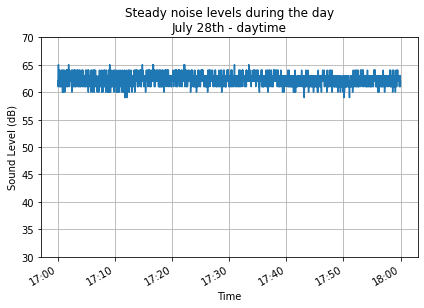

In [102]:
plot_sound_levels_from_json('data/14.json',title='Steady noise levels during the day\nJuly 28th - daytime',
    start_time=datetime(2025, 7, 27, 17, 0),
    end_time=datetime(2025, 7, 27, 18, 0))

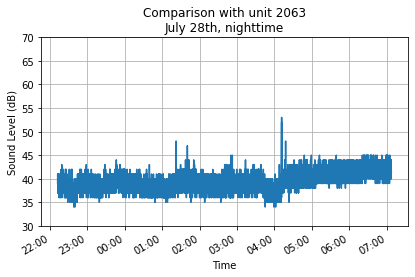

In [89]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load JSON
with open('data/15.json') as f:
    data = json.load(f)

# Parse and clean sound levels
raw_values = data['storageVolume'].split(';')
sound_levels = [int(v) for v in raw_values if v.strip().isdigit()]

# Define fixed start and adjusted window
fixed_start = datetime(2025, 7, 27, 21, 12, 36)
total_duration = timedelta(hours=10.91)

# Define plot window: skip first and last hour
plot_start = fixed_start + timedelta(hours=1)
plot_end = fixed_start + total_duration - timedelta(hours=1)

# Generate full timestamps for all samples
timestamps = [fixed_start + timedelta(seconds=i) for i in range(len(sound_levels))]

# Filter timestamps and sound levels
filtered = [
    (t, s) for t, s in zip(timestamps, sound_levels)
    if plot_start <= t <= plot_end
]

# Separate filtered values
filtered_timestamps, filtered_levels = zip(*filtered)

# Plot

plt.plot(filtered_timestamps, filtered_levels, label="Sound Level (dB)")

# Format x-axis as HH:MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time")
plt.ylabel("Sound Level (dB)")
plt.title("Comparison with unit 2063\nJuly 28th, nighttime")
plt.grid(True)
plt.tight_layout()

plt.ylim(30,70)
plt.gcf().autofmt_xdate()
plt.savefig('comparison.pdf')
plt.show()
